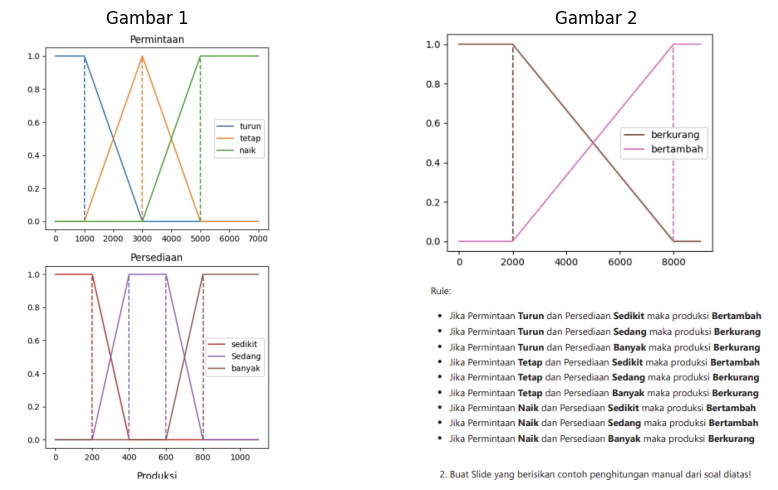

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1 = mpimg.imread('fuzzy1.png') 
img2 = mpimg.imread('fuzzy2.png')
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 
ax[0].imshow(img1)
ax[0].axis('off')
ax[0].set_title('Gambar 1')
ax[1].imshow(img2)
ax[1].axis('off') 
ax[1].set_title('Gambar 2')  
plt.tight_layout()  
plt.show()


In [19]:
# Class untuk Membership Functions
class MembershipFunctions:
    @staticmethod
    def permintaan_turun(x):
        return max(0, min(1, (3000 - x) / 2000))

    @staticmethod
    def permintaan_tetap(x):
        return max(0, min((x - 1000) / 2000, (5000 - x) / 2000))

    @staticmethod
    def permintaan_naik(x):
        return max(0, min((x - 3000) / 2000, 1))

    @staticmethod
    def persediaan_sedikit(x):
        return max(0, min(1, (100 - x) / 50))

    @staticmethod
    def persediaan_sedang(x):
        return max(0, min((x - 50) / 50, (150 - x) / 50))

    @staticmethod
    def persediaan_banyak(x):
        return max(0, min((x - 100) / 50, 1))

    @staticmethod
    def produksi_berkurang(z):
        return max(0, min(1, (3000 - z) / 2000))

    @staticmethod
    def produksi_bertambah(z):
        return max(0, min((z - 1000) / 2000, 1))


In [20]:
# Function untuk mengevaluasi setiap aturan
def evaluate_rules(permintaan, persediaan):
    mf = MembershipFunctions
    
    rules = [
        # Aturan 1: Permintaan Turun dan Persediaan Sedikit -> Produksi Bertambah
        {"rule": "Permintaan Turun dan Persediaan Sedikit -> Produksi Bertambah",
         "degree": min(mf.permintaan_turun(permintaan), mf.persediaan_sedikit(persediaan)),
         "produksi": "bertambah"},

        # Aturan 2: Permintaan Turun dan Persediaan Sedang -> Produksi Berkurang
        {"rule": "Permintaan Turun dan Persediaan Sedang -> Produksi Berkurang",
         "degree": min(mf.permintaan_turun(permintaan), mf.persediaan_sedang(persediaan)),
         "produksi": "berkurang"},

        # Aturan 3: Permintaan Turun dan Persediaan Banyak -> Produksi Berkurang
        {"rule": "Permintaan Turun dan Persediaan Banyak -> Produksi Berkurang",
         "degree": min(mf.permintaan_turun(permintaan), mf.persediaan_banyak(persediaan)),
         "produksi": "berkurang"},

        # Aturan 4: Permintaan Tetap dan Persediaan Sedikit -> Produksi Bertambah
        {"rule": "Permintaan Tetap dan Persediaan Sedikit -> Produksi Bertambah",
         "degree": min(mf.permintaan_tetap(permintaan), mf.persediaan_sedikit(persediaan)),
         "produksi": "bertambah"},

        # Aturan 5: Permintaan Tetap dan Persediaan Sedang -> Produksi Berkurang
        {"rule": "Permintaan Tetap dan Persediaan Sedang -> Produksi Berkurang",
         "degree": min(mf.permintaan_tetap(permintaan), mf.persediaan_sedang(persediaan)),
         "produksi": "berkurang"},

        # Aturan 6: Permintaan Tetap dan Persediaan Banyak -> Produksi Berkurang
        {"rule": "Permintaan Tetap dan Persediaan Banyak -> Produksi Berkurang",
         "degree": min(mf.permintaan_tetap(permintaan), mf.persediaan_banyak(persediaan)),
         "produksi": "berkurang"},

        # Aturan 7: Permintaan Naik dan Persediaan Sedikit -> Produksi Bertambah
        {"rule": "Permintaan Naik dan Persediaan Sedikit -> Produksi Bertambah",
         "degree": min(mf.permintaan_naik(permintaan), mf.persediaan_sedikit(persediaan)),
         "produksi": "bertambah"},

        # Aturan 8: Permintaan Naik dan Persediaan Sedang -> Produksi Bertambah
        {"rule": "Permintaan Naik dan Persediaan Sedang -> Produksi Bertambah",
         "degree": min(mf.permintaan_naik(permintaan), mf.persediaan_sedang(persediaan)),
         "produksi": "bertambah"},

        # Aturan 9: Permintaan Naik dan Persediaan Banyak -> Produksi Berkurang
        {"rule": "Permintaan Naik dan Persediaan Banyak -> Produksi Berkurang",
         "degree": min(mf.permintaan_naik(permintaan), mf.persediaan_banyak(persediaan)),
         "produksi": "berkurang"}
    ]
    
    return rules


In [21]:
# Function untuk menghitung output berdasarkan aturan dan defuzzifikasi
def defuzzify_output(rules):
    mf = MembershipFunctions
    num = 0
    den = 0
    
    for rule in rules:
        degree = rule["degree"]
        produksi = rule["produksi"]
        
        if produksi == "bertambah":
            z = 3000 - (degree * 2000)  # centroid 'bertambah'
        elif produksi == "berkurang":
            z = 1000 + (degree * 2000)  # centroid 'berkurang'
        
        num += degree * z
        den += degree
    
    return num / den if den != 0 else 0


In [22]:
# Contoh penggunaan dengan permintaan 3500 dan persediaan 75
permintaan = 3500
persediaan = 75

# Evaluasi rules dan hitung output
rules = evaluate_rules(permintaan, persediaan)
output = defuzzify_output(rules)

# Menampilkan hasil peraturan dan output akhir
for rule in rules:
    print(f"Rule: {rule['rule']}, Degree: {rule['degree']:.3f}")

print(f"\nOutput Defuzzifikasi Produksi: {output:.2f}")


Rule: Permintaan Turun dan Persediaan Sedikit -> Produksi Bertambah, Degree: 0.000
Rule: Permintaan Turun dan Persediaan Sedang -> Produksi Berkurang, Degree: 0.000
Rule: Permintaan Turun dan Persediaan Banyak -> Produksi Berkurang, Degree: 0.000
Rule: Permintaan Tetap dan Persediaan Sedikit -> Produksi Bertambah, Degree: 0.500
Rule: Permintaan Tetap dan Persediaan Sedang -> Produksi Berkurang, Degree: 0.500
Rule: Permintaan Tetap dan Persediaan Banyak -> Produksi Berkurang, Degree: 0.000
Rule: Permintaan Naik dan Persediaan Sedikit -> Produksi Bertambah, Degree: 0.250
Rule: Permintaan Naik dan Persediaan Sedang -> Produksi Bertambah, Degree: 0.250
Rule: Permintaan Naik dan Persediaan Banyak -> Produksi Berkurang, Degree: 0.000

Output Defuzzifikasi Produksi: 2166.67


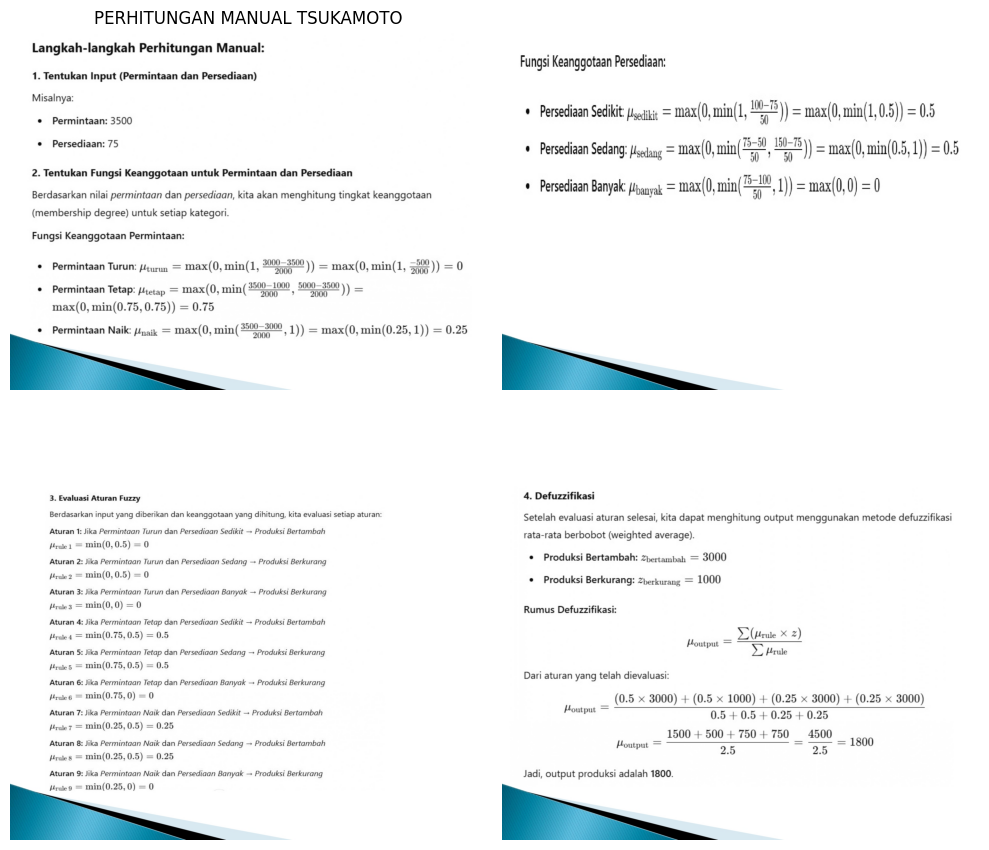

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1 = mpimg.imread('MANUAL 1.jpg')
img2 = mpimg.imread('MANUAL 2.jpg')
img3 = mpimg.imread('MANUAL 3.jpg')
img4 = mpimg.imread('MANUAL 4.jpg')
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(img1)
ax[0, 0].axis('off')
ax[0, 0].set_title('PERHITUNGAN MANUAL TSUKAMOTO')
ax[0, 1].imshow(img2)
ax[0, 1].axis('off')
ax[1, 0].imshow(img3)
ax[1, 0].axis('off')
ax[1, 1].imshow(img4)
ax[1, 1].axis('off')
plt.tight_layout()  
plt.show()
